# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

## Dataset information (for reference)
(Abstract: The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories)
### Attribute Information: (features - CHANNEL and REGION removed from data)

1)	FRESH: annual spending (m.u.) on fresh products (Continuous); 

2)	MILK: annual spending (m.u.) on milk products (Continuous); 

3)	GROCERY: annual spending (m.u.)on grocery products (Continuous); 

4)	FROZEN: annual spending (m.u.)on frozen products (Continuous) 

5)	DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous) 

6)	DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous); 

7)	CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal) 

8)	REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal) 

### Descriptive Statistics: 

                     (Minimum, Maximum, Mean, Std. Deviation) 
    FRESH            (3, 112151, 12000.30, 12647.329) 
    MILK	         (55, 73498, 5796.27, 7380.377) 
    GROCERY	         (3, 92780, 7951.28, 9503.163) 
    FROZEN	         (25, 60869, 3071.93, 4854.673) 
    DETERGENTS_PAPER (3, 40827, 2881.49, 4767.854) 
    DELICATESSEN     (3, 47943, 1524.87, 2820.106) 

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("c:/ndml/customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [3]:
data.shape

(440, 6)

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [4]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [18,199,401]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:", indices
display(samples)
#display(samples.describe())

Chosen samples of wholesale customers dataset: [18, 199, 401]


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,18601,6327,10099,2205,2767,3181
1,9670,2280,2112,520,402,347
2,27167,2801,2128,13223,92,1902


In [30]:
# total spend calc column added to sum up total spending by each client
samples_t=pd.DataFrame(samples)
samples_t['Total_spend']=samples_t.sum(axis=1)
display(samples_t)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_spend
0,18601,6327,10099,2205,2767,3181,86360
1,9670,2280,2112,520,402,347,30662
2,27167,2801,2128,13223,92,1902,94626


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

Selected consumers : 18 (0), 199 (1), 401 (2)

**Analysis**

Customer #18 - sample index 0: Supermarket ? Hotel ? 
    - Except for "Delicatessen", has a spend in the more than 50 percentile range for the rest. 
    - Looking at the spending in each category this customer could be a "large retailer" that specilizes in "Fresh" and      "Grocery" products. 
Customer #199 - sample index 1: Restaurant ? 
    - This client spent the most on "Fresh" products, followed by "Milk" and "Grocery" products. 
    - Spend on the other 4 categories is lower than the average. 
    - This suggests that this client is probably an end-user of the products like a "Restaurant" 
Customer #401 - sample index 2: Deli ? Sandwich shop ? 
    - This client spent mostly on "Fresh" and "Frozen" categories followed by "Milk" and "Grocery. 
    - The spending in the "Delicatessen" is not as much as #18 but combined with the other catergories, suggests that this client could be a "Deli" that supplies a neighbourhood.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [7]:
from sklearn.cross_validation import train_test_split
from sklearn import tree
from sklearn.metrics import r2_score
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = None
new_data = data.drop("Detergents_Paper",axis=1)
#display(new_data)
target_label= data['Detergents_Paper']

# TODO: Split the data into training and testing sets using the given feature as the target
#X_train, X_test, y_train, y_test = (None, None, None, None)
X_train, X_test, y_train, y_test = train_test_split(new_data,target_label,test_size=0.25,random_state=0)

# TODO: Create a decision tree regressor and fit it to the training set
#regressor = None
regressor = tree.DecisionTreeRegressor()
regressor.fit(X_train, y_train)
predict_result=regressor.predict(X_test)
#print predict_result

# TODO: Report the score of the prediction using the testing set
score = None
score = r2_score(y_test,predict_result)
print score

0.662627601863


In [7]:
# for general understanding
new_data = None
f_list =['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen'] 
for f in f_list:
    new_data = data.drop(f,axis=1)
#display(new_data)
    target_label= data[f]
# TODO: Split the data into training and testing sets using the given feature as the target
#X_train, X_test, y_train, y_test = (None, None, None, None)
    X_train, X_test, y_train, y_test = train_test_split(new_data,target_label,test_size=0.25,random_state=0)
# TODO: Create a decision tree regressor and fit it to the training set
#regressor = None
    regressor = tree.DecisionTreeRegressor()
    regressor.fit(X_train, y_train)
    predict_result=regressor.predict(X_test)
    #print predict_result
# TODO: Report the score of the prediction using the testing set
    score = None
    score = r2_score(y_test,predict_result)
    print f, ' ', score

Fresh   -0.462167713771
Milk   0.199364765611
Grocery   0.586613413357
Frozen   0.00793845925283
Detergents_Paper   0.715459251915
Delicatessen   -13.5457748019


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

I attempted to predict "Detergent_Paper" (target). The score was 0.662627601863 (please see the first calculation above).
As it appears to be loosely correlated to the other features, it may be dropped for predictions. Its higher score compared to some of the others with lower or negative scores (Fresh, Delicatessen etc) indicates the other scores may be more relevant to prediction than this one. 

-------------------------------------------------
(additional scores are listed in the second calculation above - that shows "Grocery" is also similar to this feature and it can be dropped also. It is to be noted that "Fresh" and "Delicatessen" with the -ve score can't be dropped as the model will then fail to fit)    
I believe the difference in the score of "Detergents_paper" between the 2 calculations is due to the randomness of the train test split. 

{Good article on R^2 score interpretation} :   http://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

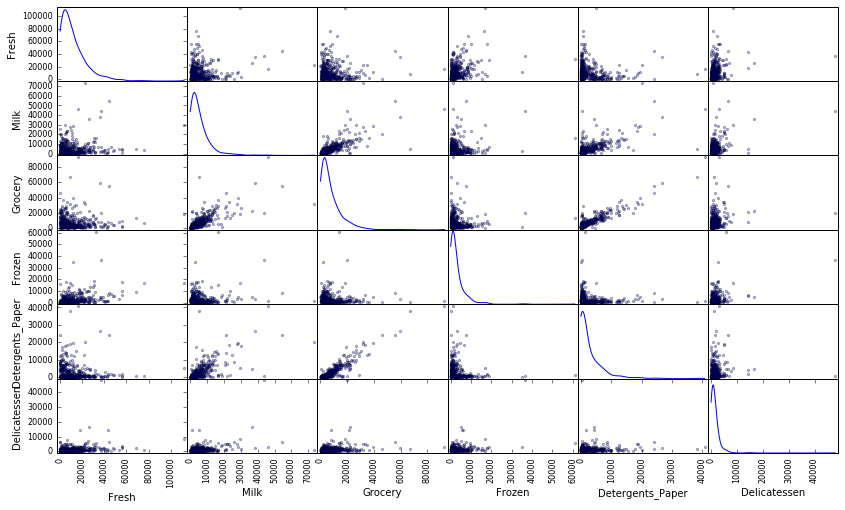

In [29]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

The pairs "Milk" and "Grocery, "Detergents_paper" and "Grocery" seem to exhibit correlation. "Milk" and "Detergents_paper" also show some level correlation. 

{quote from above" if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data"}

Based on the plots it looks like "Detergents_paper" is not that relevant, confirming the previous analysis (feature relevance)

The data distribution is not normal but skewed positively (log normal distribution).  {http://reliawiki.org/index.php/The_Lognormal_Distribution}


## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

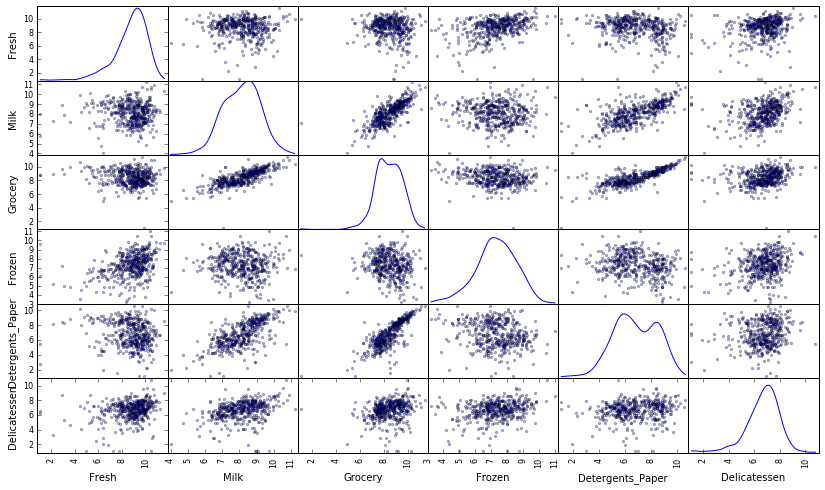

In [9]:
# TODO: Scale the data using the natural logarithm
log_data = None
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = None
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [10]:
print "Samples before log transformation"
display(samples)
# Display the log-transformed sample data
print "Samples after log transformation "
display(log_samples)

Samples before log transformation


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_spend
0,18601,6327,10099,2205,2767,3181,43180
1,9670,2280,2112,520,402,347,15331
2,27167,2801,2128,13223,92,1902,47313


Samples after log transformation 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_spend
0,9.830971,8.752581,9.220192,7.698483,7.925519,8.064951,10.673133
1,9.176784,7.731931,7.655391,6.253829,5.996452,5.849325,9.637632
2,10.209758,7.937732,7.662938,9.489713,4.521789,7.550661,10.764540


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [11]:
outliers_list=[]
outliers_list_all=[]
ol_index = {}
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = None
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = None
    Q3 = np.percentile(log_data[feature],75)
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = None
    step = 1.5 * (Q3-Q1)
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature) 
    print "Q1, Q3, Step ",Q1,Q3,step,'UF ', Q3+step,' LF ', Q1-step
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
    outliers_list = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index.tolist()
    outliers_list_all.append(outliers_list)
# OPTIONAL: Select the indices for data points you wish to remove
    for j, k in log_data[feature].iteritems():
        if not (Q1 - step <= k <= Q3 +step):
            if j not in ol_index:
                ol_index[j] = 1
            else:
                ol_index[j] += 1
    
     

#print outliers_list_all
outliers  = []
outliers = [ i for i, j in ol_index.items() if j > 1]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':
Q1, Q3, Step  8.04805870221 9.73706394795 2.53350786861 UF  12.2705718166  LF  5.51455083361


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':
Q1, Q3, Step  7.33498124004 8.88048008859 2.31824827282 UF  11.1987283614  LF  5.01673296722


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':
Q1, Q3, Step  7.67461620137 9.27385367724 2.3988562138 UF  11.672709891  LF  5.27575998758


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':
Q1, Q3, Step  6.60967774917 8.17589608318 2.34932750101 UF  10.5252235842  LF  4.26035024816


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':
Q1, Q3, Step  5.54810142479 8.27434059875 4.08935876094 UF  12.3636993597  LF  1.45874266385


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':
Q1, Q3, Step  6.01187465693 7.50672842655 2.24228065442 UF  9.74900908097  LF  3.76959400251


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


In [12]:
print " Clients with more than one outlier feature ", sorted( outliers)
#print sorted(outliers_list_all)
print "original data with multiple outlier clients "
display(data.loc[sorted(outliers)])
print "log data with multiple outlier clients"
display(log_data.loc[sorted(outliers)])
print "good data showing other records at the original indices "
display(good_data.loc[sorted(outliers)])
display(good_data.describe())
good_data.shape

 Clients with more than one outlier feature  [65, 66, 75, 128, 154]
original data with multiple outlier clients 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,85,20959,45828,36,24231,1423
66,9,1534,7417,175,3468,27
75,20398,1137,3,4407,3,975
128,140,8847,3823,142,1062,3
154,622,55,137,75,7,8


log data with multiple outlier clients


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


good data showing other records at the original indices 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,9.899128,8.818630,9.507626,7.135687,8.545003,6.726233
66,7.802209,8.890135,8.292298,8.677610,6.669498,8.037543
75,9.284148,7.069023,7.633854,7.647786,5.707110,5.117994
128,9.609318,7.616776,7.815611,6.356108,6.861711,5.793014
154,5.872118,8.949495,9.594378,5.986452,8.996776,5.713733


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,8.766671,8.128376,8.460236,7.324601,6.799008,6.694349
std,1.423133,1.062911,1.046108,1.261038,1.684562,1.261066
min,1.098612,4.718499,5.384495,3.218876,1.098612,1.098612
25%,8.073389,7.364809,7.676010,6.647029,5.560615,6.019808
50%,9.055439,8.198089,8.467372,7.340187,6.700731,6.874198
75%,9.737108,8.877379,9.274768,8.177371,8.277644,7.509609
max,11.627601,11.205013,11.437986,11.016479,10.617099,10.777768


(435, 6)

### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

Yes - clients 65, 66, 75, 128, 154 have multiple outliers. 

The above displays show the good data after these were removed. The clients with just one outlier were left in the data as removing these could lead to possible underfitting. 

The final good_data set has 435 elements compared to the original with 440 elements.

The scatter plot below - with good_data - shows that the distribution is better and closer to normal than the original data

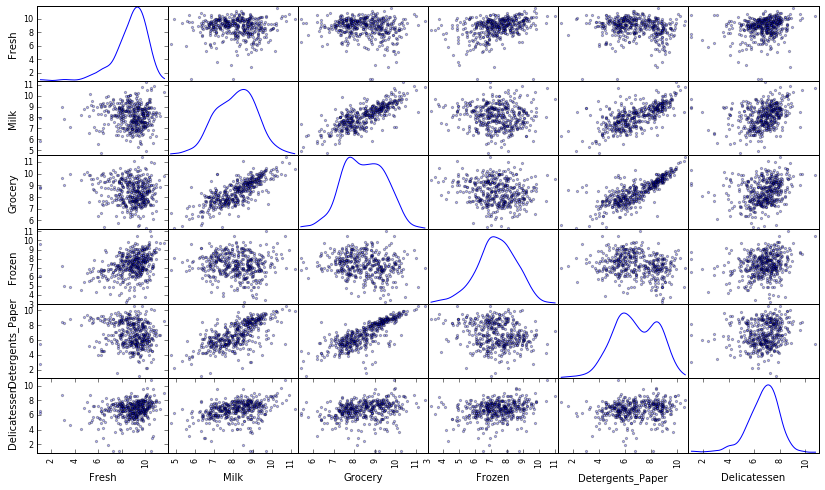

In [31]:
pd.scatter_matrix(good_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [32]:
#good_data.shape
#log_samples.shape
# cleaning up log_samples for extra column of total spend
#log_samples.drop(['Total_spend'], axis = 1, inplace = True)
log_samples.shape

(3, 6)

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

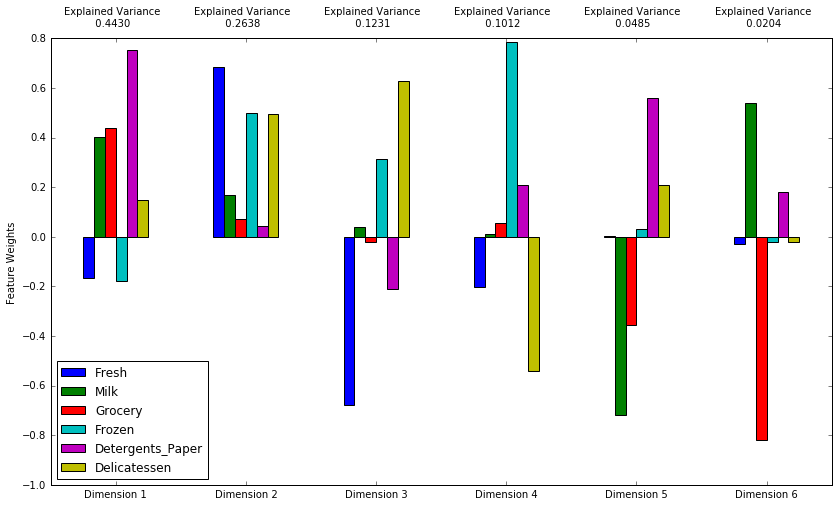

In [16]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = None
pca = PCA(n_components=6)
pca.fit(good_data)


# TODO: Transform the sample log-data using the PCA fit above
#pca_samples = None
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

In [17]:
print pca_results['Explained Variance'].cumsum()

Dimension 1    0.4430
Dimension 2    0.7068
Dimension 3    0.8299
Dimension 4    0.9311
Dimension 5    0.9796
Dimension 6    1.0000
Name: Explained Variance, dtype: float64


### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

Total variance by the 1st and 2nd principal components: 0.7068

Total variance by 1 thru 4 principal components: 0.9311  -> so the first 4 dimensions account for over 90% of variations. 

Representation of customer spending - based on the 4 dimensions:

1. Dimension 1 has a high correlation to "Detergents_paper", followed by "Grocery" and "Milk" 
   = this could indicate a client buying a lot of these compared to other products. This could be a "retailer"
2. Dimension 2 has all the features positive to varying degree, the highest being "Fresh" followed by "Frozen" and "Delicatessan" = this suggests a "deli" or "sandwich shop" etc.
3. Dimension 3 is high on Delicatessan and Frozen and Milk but large negatives of Fresh, Detergents Paper and Grocery. This would strongly indicate a  prepared food store like a "Delicatessen"
4. Dimension 4 is high on Frozen, followed by Detergents Paper,Grocery and Milk. The negative aspects are Delicatessan and Fresh. This could be similar to 1 above, possibly a retailer or a store. 



### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [18]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,1.3906,1.8004,0.0301,-0.3807,0.2116,-0.1467
1,-1.1193,-0.8295,-0.9766,-0.6846,-0.0879,0.3266
2,-2.6362,2.3118,0.7328,0.4172,-0.5960,0.0324


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [19]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = None
pca = PCA(n_components=2)
pca.fit(good_data)
# TODO: Transform the good data using the PCA fit above
reduced_data = None
reduced_data = pca.transform(good_data)
# TODO: Transform the sample log-data using the PCA fit above
pca_samples = None
pca_samples = pca.transform(log_samples)
# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [20]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,1.3906,1.8004
1,-1.1193,-0.8295
2,-2.6362,2.3118


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

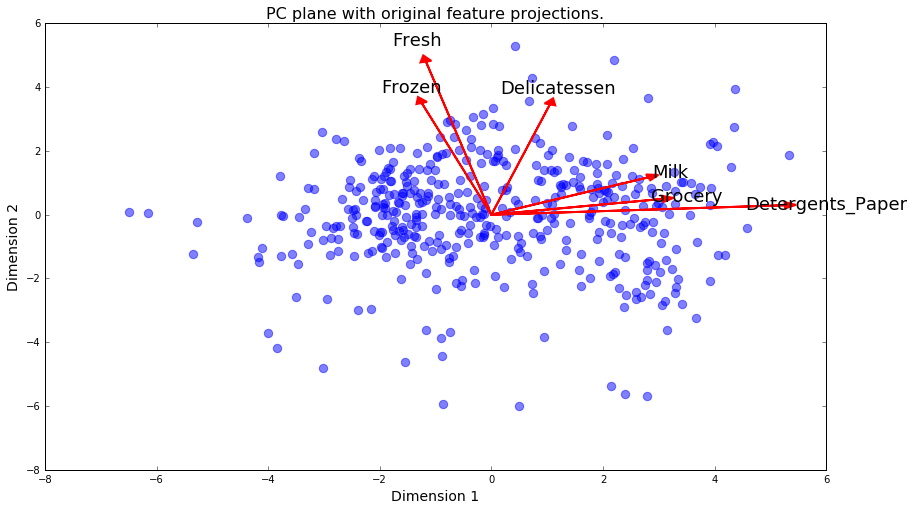

In [21]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

K-Means clustering is based on the means and building clusters around the means. It is faster to execute and is easier to implement (as the model is not "rich" like GMM). As it created tighter clusters, the results may be easier to interpret.

GMM is good when the clusters of data seem to overlap. Probabilities are used (different from K-means) to indicate which clusters the points could belong. 

It is interesting to learn that K-means is a special case of GMM clustering.

This I found sums up the K-means vs GMM situation nicely : 
Another implication of its covariance structure is that GMM allows for mixed membership of points to clusters. In kmeans, a point belongs to one and only one cluster, whereas in GMM a point belongs to each cluster to a different degree. The degree is based on the probability of the point being generated from each cluster’s (multivariate) normal distribution, with cluster center as the distribution’s mean and cluster covariance as its covariance. Depending on the task, mixed membership may be more appropriate (e.g. news articles can belong to multiple topic clusters) or not (e.g. organisms can belong to only one species).
https://www.quora.com/What-are-the-advantages-to-using-a-Gaussian-Mixture-Model-clustering-algorithm


As our data seems to be belonging to multiple clusters, possibly overlapping each other, it may be good to use the GMM algorithm.

References:
http://nlpers.blogspot.com/2009/11/k-means-vs-gmm-sum-product-vs-max.html (K-means vs GMM article)

https://uwdatasci.wordpress.com/2012/01/06/gaussian-mixture-model-k-means-algorithm-and-how-to-solve-them/ 

https://en.wikipedia.org/wiki/K-means_clustering
https://en.wikipedia.org/wiki/Mixture_model



### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [35]:
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score

for i in range(2,7):
    clusterer = GMM(n_components=i)
    clusterer.fit(reduced_data)
    preds=clusterer.predict(reduced_data)
    centers = clusterer.means_
    sample_preds = clusterer.predict(pca_samples)
    score = silhouette_score(reduced_data,preds)
    print "Cluster = ", i, "silhouette score ", score

Cluster =  2 silhouette score  0.411818864386
Cluster =  3 silhouette score  0.37513463899
Cluster =  4 silhouette score  0.332470648079
Cluster =  5 silhouette score  0.295441470747
Cluster =  6 silhouette score  0.287395927555


In [36]:
#from sklearn.mixture import GMM
#from sklearn.metrics import silhouette_score
# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = None
clusterer = GMM(n_components=2)
clusterer.fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = None
preds=clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = None
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = None
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = None
score = silhouette_score(reduced_data,preds)
print score

0.411818864386


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

In [37]:
#for i in range(2,7):
#    clusterer = GMM(n_components=i)
#    clusterer.fit(reduced_data)
#    preds=clusterer.predict(reduced_data)
#    centers = clusterer.means_
#    sample_preds = clusterer.predict(pca_samples)
#    score = silhouette_score(reduced_data,preds)
#    print "Cluster = ", i, "silohoutte score ", score
# moved to above to selected number of components

**Answer:**

Cluster =  2 silhouette score  0.411818864386

Cluster =  3 silhouette score  0.37513463899

Cluster =  4 silhouette score  0.332470648079

Cluster =  5 silhouette score  0.295441470747

Cluster =  6 silhouette score  0.287395927555


*    - Tried clusters from 2 to 6 and the score for 2 components (0.411818864386) is the best - please see above

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

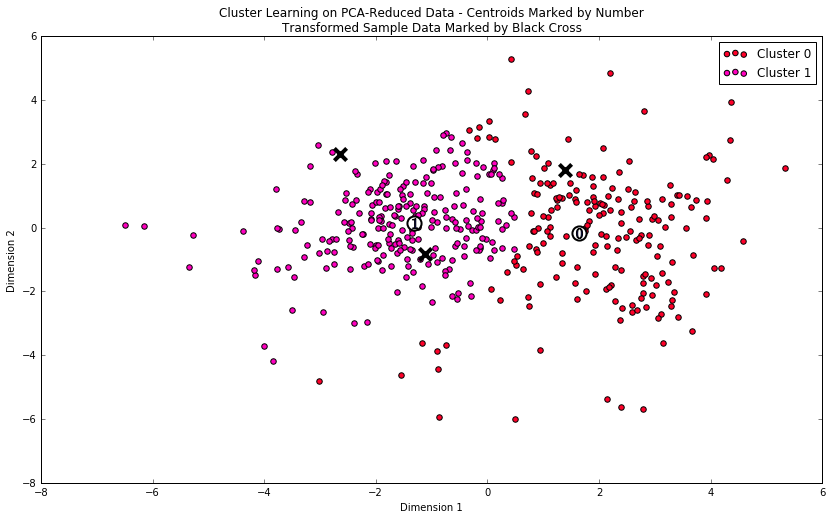

In [38]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [39]:
# TODO: Inverse transform the centers
log_centers = None
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = None
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,4316.0,6347.0,9555.0,1036.0,3046.0,945.0
Segment 1,8812.0,2052.0,2689.0,2058.0,337.0,712.0


In [42]:
display (data.median())
display(data.describe())

Fresh               8504.0
Milk                3627.0
Grocery             4755.5
Frozen              1526.0
Detergents_Paper     816.5
Delicatessen         965.5
dtype: float64

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**
There seems to be not a huge differentiation between Segment 0 and Segment 1.

Segment 0 -  This has Fresh, Milk and Grocery above the median, Frozen and Detergents_Paper lower and Delicatessan very close.
 This could indicate a small retailer that sells these items. It could be a deli also.  
 
Segment 1 - Here only the Frozen has higher spend than the median, with Fresh close to median, rest lower with Detergents_paper significantly lower.  This segment could represent an enduser of these products such as a hotel or restaurant.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [43]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1


**Answer:**

The predictions are given above - Sample 0 belongs to Cluster 0, Samples 1 & 2 belongs to Cluster 1.

The original estimates were - Sample 0 may be a Larger Retailer, Sample 1 could be a Restaurant and Sample 3 could be a Deli or a local supplies stores.

As per the analysis it seems Sample 0 may belong to Cluster 0 as that segment seems to be retailer of Fresh, Milk, Grocery products (as suggested before)

Sample 1 was supposed to be a "restaurant' and here it belongs to Cluster 1 - which seems to represent an end user of Frozen and Fresh products such as a hotel or similar establishment.

Sample 2 was suggested as Deli or a neighbourhood store but here it is in CLuster 1 which shows more similarity to an enduser than a retailes. So this could be an incorrect original assessment.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

The clients seem to be clustered as Retailers and end users (Restaurants), broadly speaking. The consumers of Fresh and Milk categories will get affected by a reduced delivery service whereas the retailers may be able to manage as they may have storage options for their products. 

I believe the retailers may act positively to a reduced delivery schedule (as it may involve less work on 2 nn-delivery days) but may have issues as they will now have to store more product (as there is no day to day replenishments). 

The restaurant customers may react negatively as they may have to invest in cold storage etc now to store the extra items because of reduced delivery. 

I would suggest trying the reduced delivery first with the retailers and then try the same with a small set of clients from cluster 1 . 

Due to the different characteristics of the clients, I don't think the change will affect the customers equally. It will affect the clients who need products that need to be fresh and do not require a lot of special cold storage requirements. 


### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

The target variable could be the name of the cluster just like we have done above. There are labels such as Retail or Hotel that can be used to name the segments. 

K-means clustering algorithm could be a good one to use to label the new customers as it works well with labelled data. 


### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

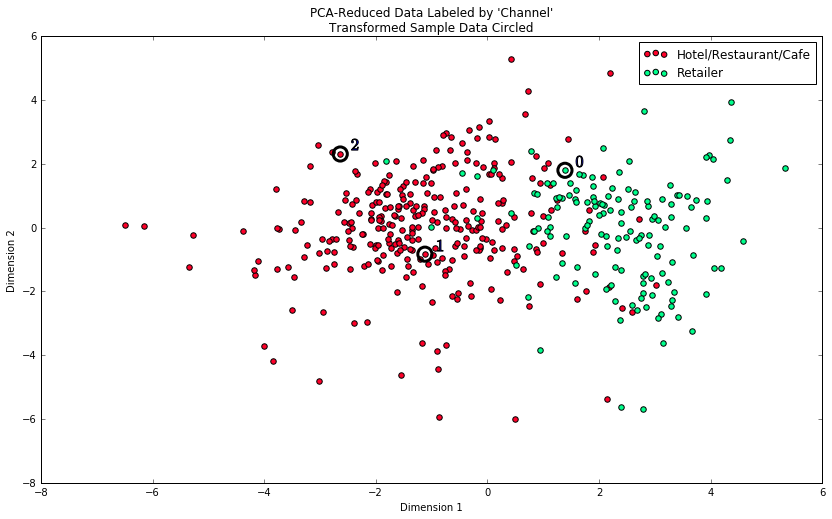

In [45]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

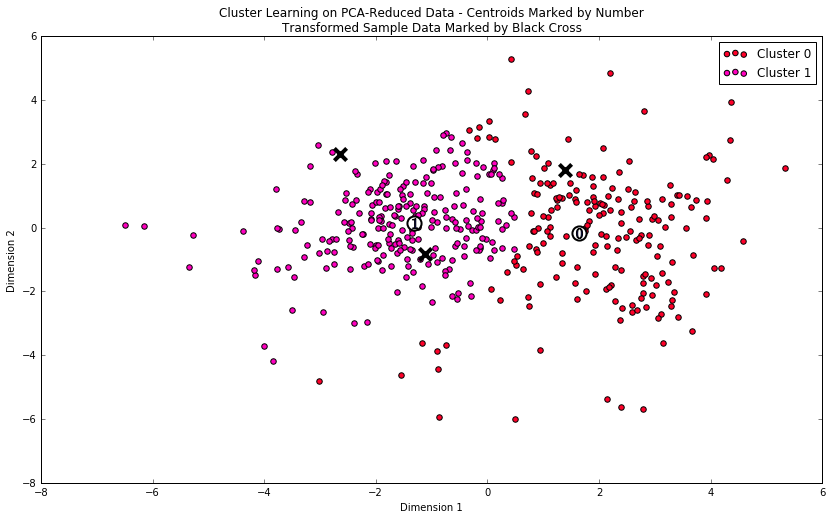

In [46]:
# Display the results of the clustering from implementation for comparison
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

The channel results and the cluster results are very similar as can be seen above. 
The Channel results show that there are some Retailer clients that are in the HoReCA cluster. Similarly there are HoReCa clients in the Retail cluster.  It should be noted that some of the clients seem to be "crossing" the border between these 2 broad catgories. 

As the data shows in the plots the initial analysis seems to place the sample clients in their respective clusters. 


Note: It would have helped to have definitions of the categories before the analysis so one could have done a better prediction!

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.